# DAS - UE1 - Teil 2 - Brunner Michael - se21m021


# Import necessary dependencies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

To be able to work with the data on my laptop I took a look at a sample of 50.000 data-points. Fortunately the data is mixed in the initial dataset, so reordering is not required.
I found that at a number of 50.000 the variations in data-points was low enough to get meaningful results.

In [22]:

census_data = pd.read_csv('.\\data\\census\\USCensus1990.data.txt', sep=",")

In [23]:
census_data = census_data.sample(frac=1, random_state=42)
census_data = census_data.iloc[:50000, 1:]

# Show dataset features and values

Because there is a very high count of different attributes I chose some attributes that seemed interesting to me.
Going into this analysis I wanted to take a look at following aspects:
* Is there a connection between sex and earnings?
* Is there a connection between peoples age and their earnings?
* Is there a connection between the education level and earnings?

In [24]:
attributes = ['dAge', 'iSex', 'iEnglish', 'dIncome1', 'dIndustry', "dHours",
               'dRearning', "iSchool", "iYearsch"]

census_data_reduced = census_data[attributes]
census_data_reduced.head()

dAge  iSex  iEnglish  dIncome1  dIndustry  dHours  dRearning  \
179679      1     0         0         0          0       0          0   
1518742     2     0         0         0          0       0          0   
158328      5     1         0         1          8       1          2   
1018288     3     1         1         1          7       1          2   
68171       7     1         0         0          0       0          0   

         iSchool  iYearsch  
179679         1         1  
1518742        2         7  
158328         1        12  
1018288        2        11  
68171          1        14

# Exploratory Data Analysis and Visualizations

# Univariate Analysis

## Visualizing one dimension

Again, to show the distribution of different attributes I took a look at the histograms for all of them.
The majority of people in this dataset speak english.
There is a high number of people that have a High School Diploma or Ged (iYearsch == 10)
The majority of people don't attend school, which makes sense, because the dataset seems to mainly contain adults, or people that no longer attend school.
Also lower earnings and incomes seem to be more common than higher ones.

In [25]:
census_data_reduced.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.2, 2.2))

# Multivariate Analysis

To analyze the connection between different attributes and to see, if the assumptions, that have been made at the beginning of the analysis are true I plotted a correlation map of the different attributes I chose.

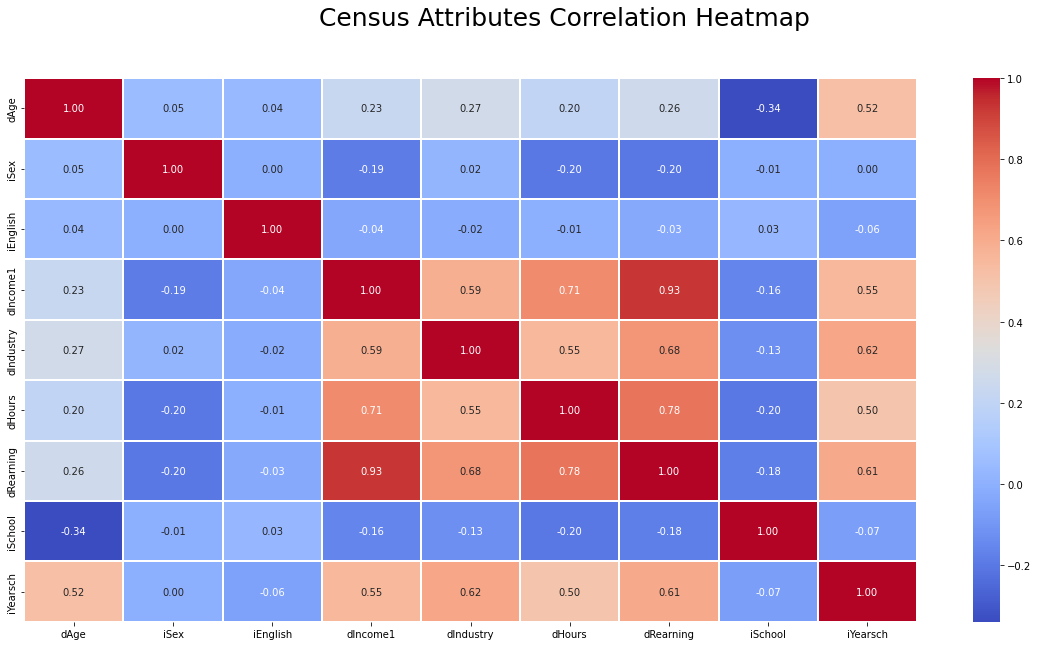

In [26]:
f, ax = plt.subplots(figsize=(20, 10))
corr = census_data_reduced.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
            linewidths=.05)

t= f.suptitle('Census Attributes Correlation Heatmap', fontsize=25)

There are several correlations that are interesting:

There is a connection between...
* Income and hours worked
* Income and earnings
* Income and industry
* Eduction and income

Which makes sense.
People that work more ours would likely have a bigger income.
Different Industries might also pay more or less, which would explain the connection between income and industry.
Also, a higher income leads to higher earnings.
Different levels of eduction might result in higher or lower income.

The correlation between sex and income does not seem to be too strong, however, I will take a look at this separately.

To confirm all these statements I took a look at these attributes in combination.

### Correlation between sex and income

The following graph shows, that there is definitely a difference in incomes combined with the respective sex of the employed.
There are more women with lower incomes than men.
The higher the income gets, man take over and dominate in the higher income categories.

In [27]:
census_data_with_income = census_data.drop(census_data[(census_data.dIncome1 == 0)].index)

Text(0.5, 1.0, 'Income split by sex (0 = male, 1 = female)')

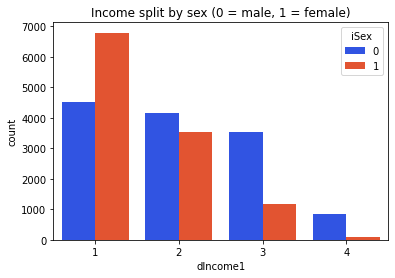

In [28]:
cp = sns.countplot(x="dIncome1", hue="iSex", data=census_data_with_income,
                   palette={0: "#1442FF", 1: "#FF4214"})
cp.set_title("Income split by sex (0 = male, 1 = female)")

To better understand the found correlations between the attributes I plotted a pairplot of the attributes.


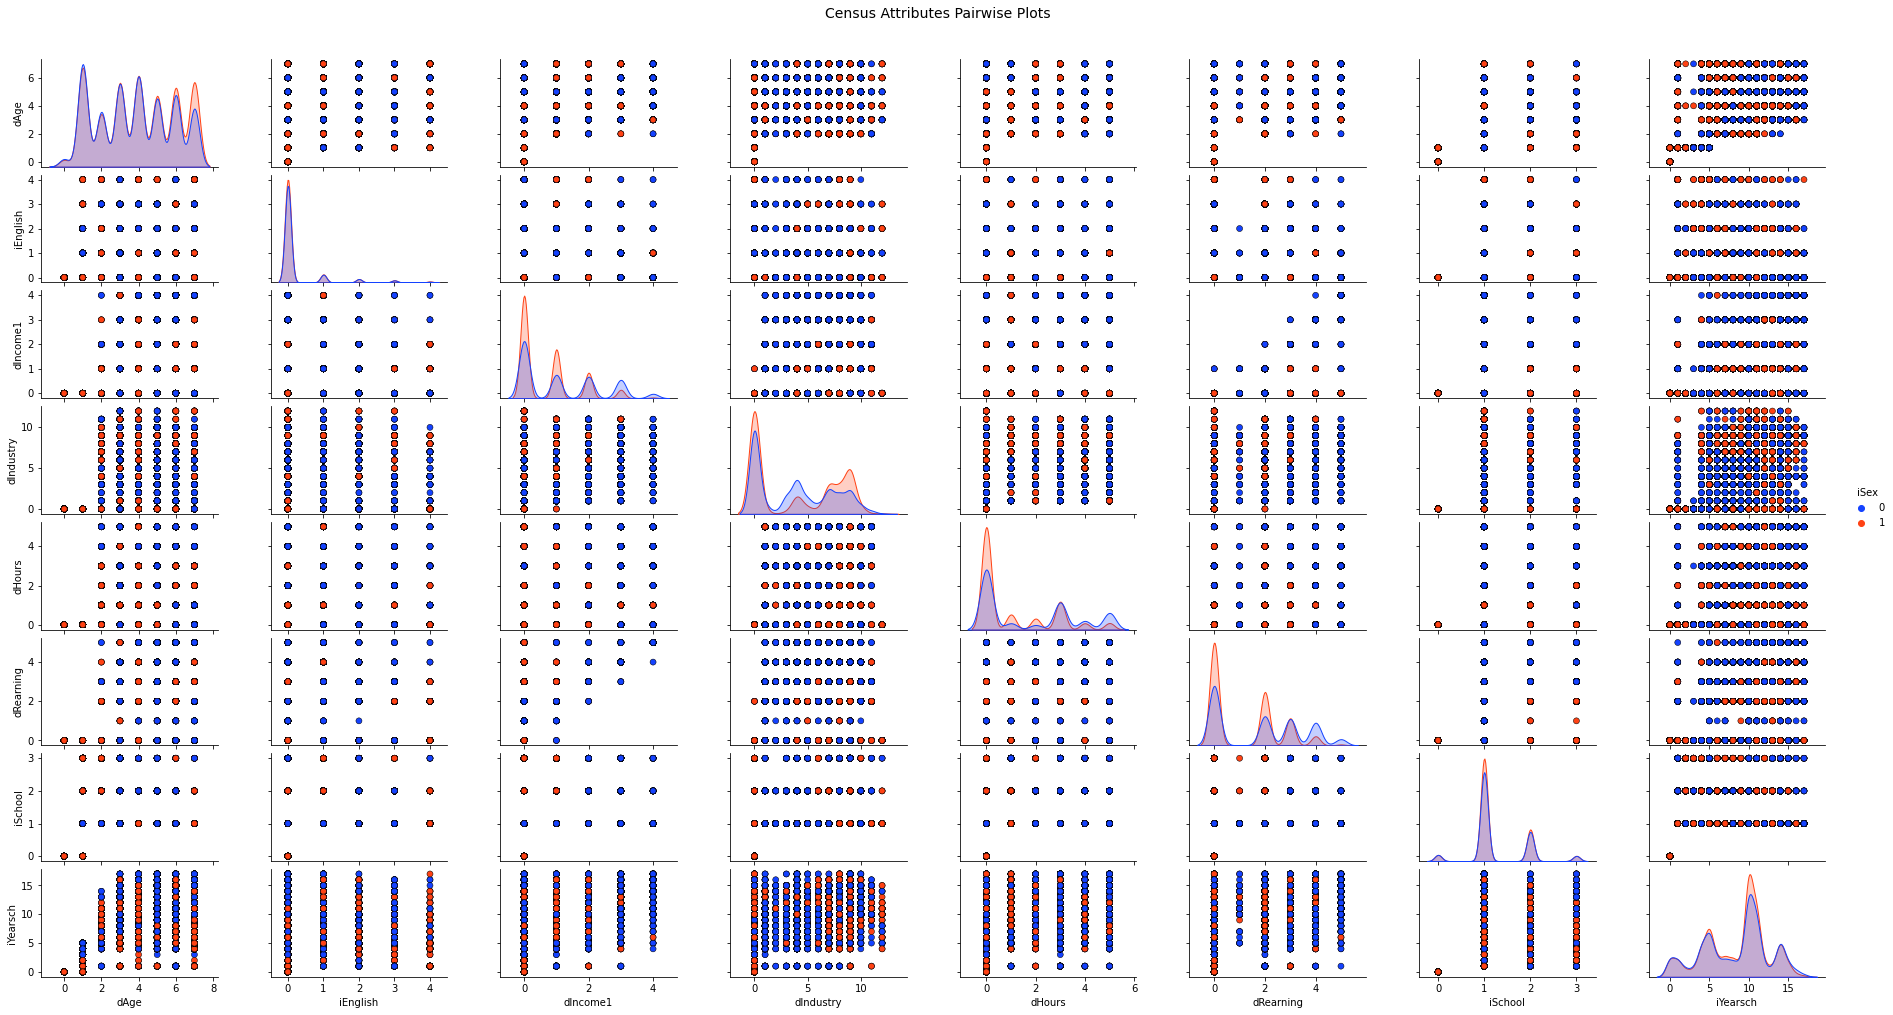

In [29]:
pp = sns.pairplot(census_data_reduced, hue='iSex', height=1.8, aspect=1.8,
                  palette={0: "#1442FF", 1: "#FF4214"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Census Attributes Pairwise Plots', fontsize=14)

Two noteworthy things are, that there were more women that worked lower hours and had a lower income than men.

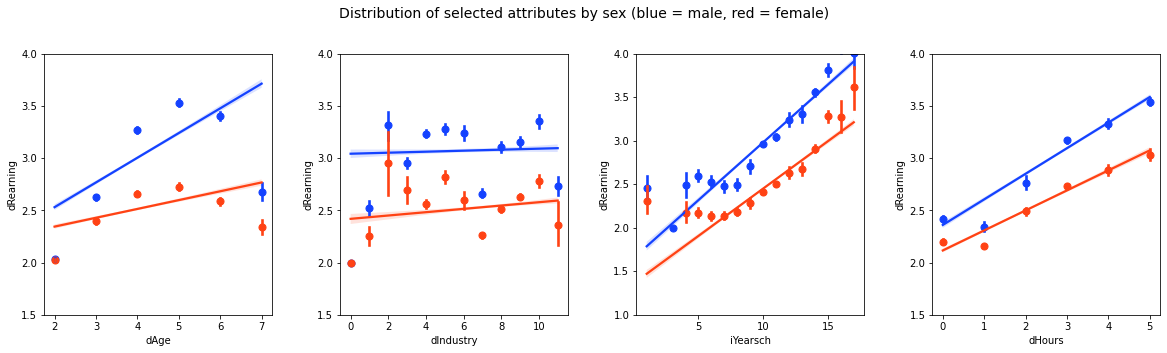

In [30]:
fig = plt.figure(figsize = (20, 5))
title = fig.suptitle("Distribution of selected attributes by sex (blue = male, red = female)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_xlabel("Hours worked group")
ax1.set_ylabel("Density")
ax1.set_ylim([1.5, 4])

ax2 = fig.add_subplot(1,4, 2)
ax2.set_xlabel("Industry vs Earnings")
ax2.set_ylabel("Density")
ax2.set_ylim([1.5, 4])

ax3 = fig.add_subplot(1,4, 3)
ax3.set_xlabel("Eduction Level group")
ax3.set_ylabel("Density")
ax3.set_ylim([1, 4])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_xlabel("Yearly Earnings group")
ax4.set_ylabel("Density")
ax4.set_ylim([1.5, 4])

for sex_id in [0,1]:

    data = census_data_with_income.loc[census_data_with_income['iSex'] == sex_id]

    if sex_id == 1:
        color = "#FF4214"
    else:
        color = "#1442FF"


    sns.regplot(data=data, x='dAge', y="dRearning", ax=ax1, fit_reg = True, x_estimator=np.mean, color=color)


    sns.regplot(data=data, x='dIndustry', y="dRearning",ax=ax2, fit_reg = True, x_estimator=np.mean, color=color)


    sns.regplot(data=data, x='iYearsch', y="dRearning",ax=ax3, fit_reg = True, x_estimator=np.mean, color=color)


    sns.regplot(data=data, x='dHours', y="dRearning",ax=ax4, fit_reg = True,x_estimator=np.mean, color=color)


### Findings:

Generally the earnings of women were lower than the earnings of men in 1990
Furthermore they don't scale as well as mens earnings do.
Men with higher eduction, and or longer hours, and or higher age get a bigger increase in earnings than women do.
However, if we take a close look at the graph that shows the regressions for different types of industry we can see, that women get a little bit better scaling of their earnings with higher order industries.

So to answer the questions from the beginning of the analysis:

* Is there a connection between sex and earnings?
 * Yes! In 1990 there were more women that had a lower earnings than man. Vice versa in the higher earnings categories, there were more man than women.
* Is there a connection between peoples age and their earnings?
 * Yes. Generally people seem to have higher earnings with rising age.
* Is there a connection between the education level and earnings?
 * Also yes. A higher order of Eduction results in higher earnings.

A general observation is, that men generally got more earnings than women did.